In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [10]:
df = pd.read_csv("Automobile_project.csv")
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression-ratio,horsepower,peak_rpm,city_mpg,highwa_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,compression-ratio,city_mpg,highwa_mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450


Categorical Variables



,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500


In [13]:
df['Bore'] = df['bore'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['Bore'] = df['Bore'].astype(float) # .................. Turn the new column to a numerical datatype
df['Stroke'] = df['stroke'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['Stroke'] = df['Stroke'].astype(float) # .................. Turn the new column to a numerical datatype
df['Horsepower'] = df['horsepower'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['Horsepower'] = df['Horsepower'].astype(float) # .................. Turn the new column to a numerical datatype
df['Peak_rpm'] = df['peak_rpm'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['Peak_rpm'] = df['Peak_rpm'].astype(float) # .................. Turn the new column to a numerical datatype

In [14]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,compression-ratio,city_mpg,highwa_mpg,price,Bore,Stroke,Horsepower,Peak_rpm
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495,3.0,2.0,111.0,5000.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,3.0,2.0,111.0,5000.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500,2.0,3.0,154.0,5000.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,3.0,3.0,102.0,5500.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,3.0,3.0,115.0,5500.0


Categorical Variables



,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500


In [15]:
df.drop(['bore','stroke','horsepower','peak_rpm'], axis = 1, inplace = True)

In [108]:
df.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
compression-ratio     0
city_mpg              0
highwa_mpg            0
price                 0
Bore                  4
Stroke                4
Horsepower            2
Peak_rpm              2
dtype: int64

In [109]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,compression-ratio,city_mpg,highwa_mpg,price,Bore,Stroke,Horsepower,Peak_rpm
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,9.0,21,27,13495,3.0,2.0,111.0,5000.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,9.0,21,27,16500,3.0,2.0,111.0,5000.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,9.0,19,26,16500,2.0,3.0,154.0,5000.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,10.0,24,30,13950,3.0,3.0,102.0,5500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,8.0,18,22,17450,3.0,3.0,115.0,5500.0


Text(0.5, 1.0, 'price by compression-ratio')

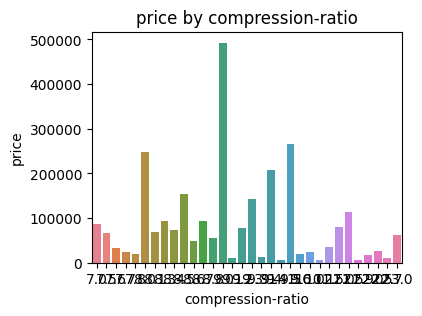

In [110]:
sns.barplot(data=df, x='compression-ratio', y='price', estimator = 'sum', ci = 0, palette='husl')
plt.title('price by compression-ratio')

Text(0.5, 1.0, 'make with the Highest price')

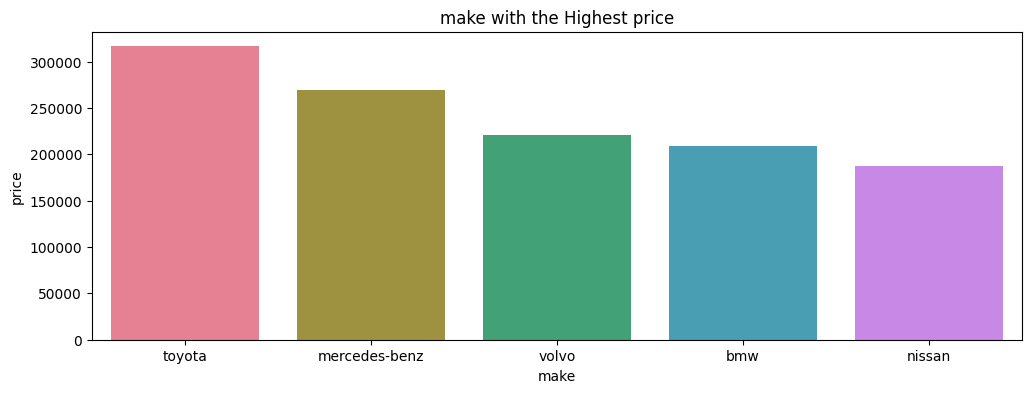

In [111]:
sal = df.groupby('make')[['price']].sum().sort_values(by = 'price', ascending = False).head(5)
plt.figure(figsize = (12, 4))
sns.barplot(data=sal, x=sal.index, y='price', estimator = 'sum', ci = 0, palette='husl')
plt.title('make with the Highest price')

In [16]:
def cleaner(dataframe):
    for i in dataframe.columns: # ---------------------------------------------- Iterate through the columns of the data
        if ((dataframe[i].isnull().sum() / len(dataframe)) * 100) > 30: # ------ Check if the columns has above 30% of its data
            dataframe.drop(i, axis = 1, inplace = True)# ----------------------- Drop such columns
        elif dataframe[i].dtypes == 'O': # ------------------------------------- Select all categorical columns
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True) # ------ Replace the missing  with the mode
        else:
            dataframe[i].fillna(dataframe[i].median(), inplace = True) # ------- select all numerical columns and clean missing with the median
    return dataframe
cleaner(df)



,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,compression-ratio,city_mpg,highwa_mpg,price,Bore,Stroke,Horsepower,Peak_rpm
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,9.0,21,27,13495,3.0,2.0,111.0,5000.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,9.0,21,27,16500,3.0,2.0,111.0,5000.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,9.0,19,26,16500,2.0,3.0,154.0,5000.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,10.0,24,30,13950,3.0,3.0,102.0,5500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,8.0,18,22,17450,3.0,3.0,115.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,8.7,19,25,19045,3.0,3.0,160.0,5300.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,8.8,18,23,21485,3.0,2.0,134.0,5500.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,23.0,26,27,22470,3.0,3.0,106.0,4800.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,9.5,19,25,22625,3.0,3.0,114.0,5400.0


In [18]:
dx = df.copy()

In [19]:
import joblib
from sklearn.preprocessing import LabelEncoder
for i in df.columns: # ------------------------------------------------------ iterate through the columns and find all categoricals
    if df[i].dtypes == 'O': # ----------------------------------------------- select all categoricals
        lb = LabelEncoder()
        df[i] = lb.fit_transform(df[i]) # -------------------------------- Transform the selected data.
        joblib.dump(lb, open(f'{i}_encoder.pkl', 'wb'))
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,compression-ratio,city_mpg,highwa_mpg,price,Bore,Stroke,Horsepower,Peak_rpm
0,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,9.0,21,27,13495,3.0,2.0,111.0,5000.0
1,3,115.0,0,1,0,1,0,2,0,88.6,...,130,5,9.0,21,27,16500,3.0,2.0,111.0,5000.0
2,1,115.0,0,1,0,1,2,2,0,94.5,...,152,5,9.0,19,26,16500,2.0,3.0,154.0,5000.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,10.0,24,30,13950,3.0,3.0,102.0,5500.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,8.0,18,22,17450,3.0,3.0,115.0,5500.0


In [114]:
df['make'].head()

0    0
1    0
2    0
3    1
4    1
Name: make, dtype: int32

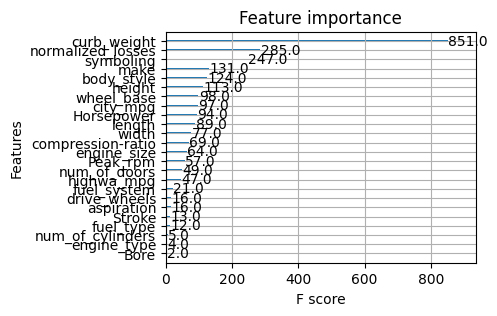

In [115]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBRegressor()

x = df.drop('price', axis = 1)
y = df.price

model.fit(x, y)

plt.rcParams['figure.figsize'] = (4, 3)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [116]:
sel_cols = ['curb_weight','symboling','normalized_losses','height','make','body_style','price']
sel_df = df[sel_cols]
sel_df.head()

,curb_weight,symboling,normalized_losses,height,make,body_style,price
0,2548,3,115.0,48.8,0,0,13495
1,2548,3,115.0,48.8,0,0,16500
2,2823,1,115.0,52.4,0,2,16500
3,2337,2,164.0,54.3,1,3,13950
4,2824,2,164.0,54.3,1,3,17450


In [117]:
from sklearn.model_selection import train_test_split

x = sel_df.drop('price', axis = 1)
y = sel_df.price

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 7)
print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))

xtrain: (161, 6)
xtest: (41, 6)
ytrain: (161,)
ytest: (41,)


In [118]:
# Modelling For rand
from sklearn.ensemble import RandomForestRegressor
rand_model = RandomForestRegressor()
rand_model.fit(xtrain, ytrain)
# cross-validate the model
cross_val = rand_model.predict(xtrain)
# metric
print(f'rand Mean Error: {mean_absolute_error(cross_val, ytrain).round(2)}')
print(f'rand Model Perandormance: {r2_score(cross_val, ytrain).round(2)}')

rand Mean Error: 767.46
rand Model Perandormance: 0.97


In [119]:
from sklearn.preprocessing import LabelEncoder
import pickle, joblib

make_encode = LabelEncoder()
sel_df['make'] = make_encode.fit_transform(sel_df[['make']])
joblib.dump(make_encode, 'make_encode.pkl')

body_style_encode = LabelEncoder()
sel_df['body_style'] = body_style_encode.fit_transform(sel_df[['body_style']])
joblib.dump(body_style_encode, 'body_style_encode.pkl')

['body_style_encode.pkl']

In [120]:
joblib.dump(rand_model, 'automobile_model.pkl')

['automobile_model.pkl']